In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn import svm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
#load data
data = loadmat('data1.mat')
print(data)
x_data, y_data = data['X'], data['y']     #The data structure

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011', '__version__': '1.0', '__globals__': [], 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  ,

In [3]:
def train_model(x_data, y_data, c):
    #split dataset
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
    #train model
    if c == '':
        model = svm.LinearSVC(dual=True)
    else:
        model = svm.LinearSVC(dual=False, C=c)

    model.fit(x_train, y_train.ravel())  #The model fitting

    W = model.coef_[0]  #coefficient
    B = model.intercept_[0]  #intercept

    def acc(x, y):  #accuracy of calculation
        return model.score(x, y)

    print('coefficient:{}  intercept:{}'.format(W, B))
    print('train accuracy:{}  test accuracy:{}'.format(acc(x_train, y_train),acc(x_test, y_test)))
    return x_train, x_test, y_train, y_test, W, B

In [4]:
def plot(x_test, y_test, W, B, c):#visual decision boundary
    plt.subplot()
    plt.scatter(x_test[:,0], x_test[:,1], c=np.squeeze(y_test))  #散点图
    x = np.linspace(0,5,10)
    y = -(W[0]*x + B)/W[1]
    plt.plot(x, y)  #直线
    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.title('决策边界(C={})'.format(c))
    plt.show()

coefficient:[0.37950141 0.68427112]  intercept:-3.092995218384435
train accuracy:0.9714285714285714  test accuracy:1.0


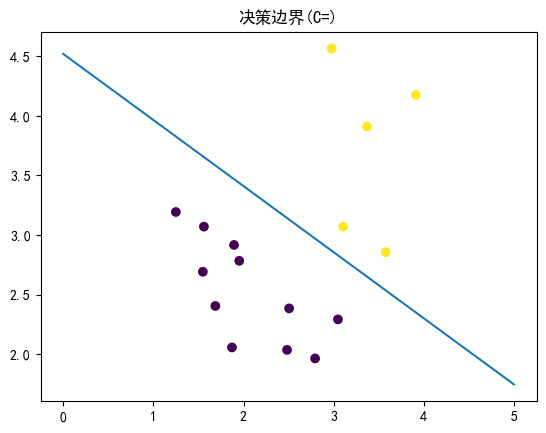

In [5]:
x_train, x_test, y_train, y_test, W, B = train_model(x_data, y_data, '')
plot(x_test, y_test, W, B, '')

coefficient:[1.72216572 6.08207555]  intercept:-24.30289811332251
train accuracy:1.0  test accuracy:0.875


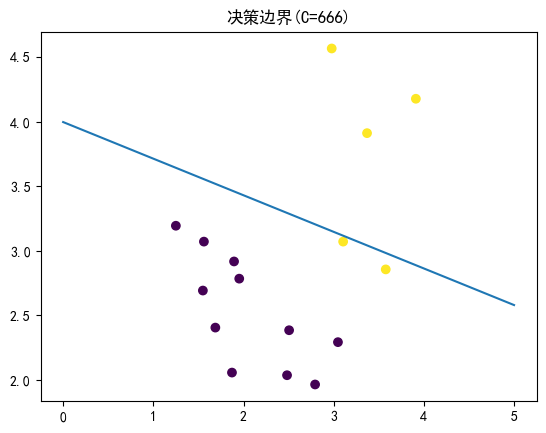

In [6]:
x_train, x_test, y_train, y_test, W, B = train_model(x_data, y_data, 666)
plot(x_test, y_test, W, B, '666')

coefficient:[0.37950073 0.68427014]  intercept:-3.0929881908335846
train accuracy:0.9714285714285714  test accuracy:1.0


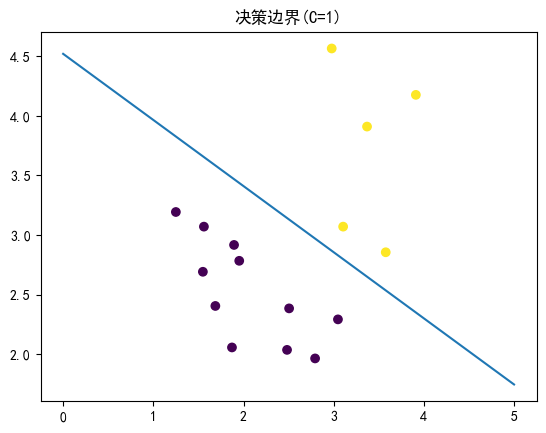

In [7]:
x_train, x_test, y_train, y_test, W, B = train_model(x_data, y_data, 1)
plot(x_test, y_test, W, B, '1')

In [8]:
#load data
data = loadmat('data2.mat')
print(data)
x_data, y_data = data['X'], data['y']     #The data structure
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0.107143 , 0.60307  ],
       [0.093318 , 0.649854 ],
       [0.0979263, 0.705409 ],
       ...,
       [0.975806 , 0.439474 ],
       [0.989631 , 0.425439 ],
       [0.996544 , 0.414912 ]]), 'y': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
     

In [9]:
def train_model_logtic(x_train, y_train, gamma, kernel):
    #train model
    model_logtic = svm.SVC(kernel=kernel,gamma=gamma)
    model_logtic.fit(x_train, y_train.ravel())  #The model fitting
    def acc(x, y):  #accuracy of calculation
        return model_logtic.score(x, y)
    print('train accuracy:{}  test accuracy:{}'.format(acc(x_train, y_train),acc(x_test, y_test)))
    return model_logtic


In [10]:
#Nonlinear boundary diagram
def plot_scatter(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    y_reshape = y_predict.reshape(x0.shape)
    color_map = ListedColormap(['#FFFAF0','#002681','#698B69'])  #categorize by color
    plt.contourf(x0, x1, y_reshape, cmap=color_map)

def plt_fig(model_logtic, x, y, title):
    plot_scatter(model_logtic, axis=[0, 1.3, 0.2, 1])
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))
    plt.title(title)

train accuracy:0.9983443708609272  test accuracy:0.9922779922779923


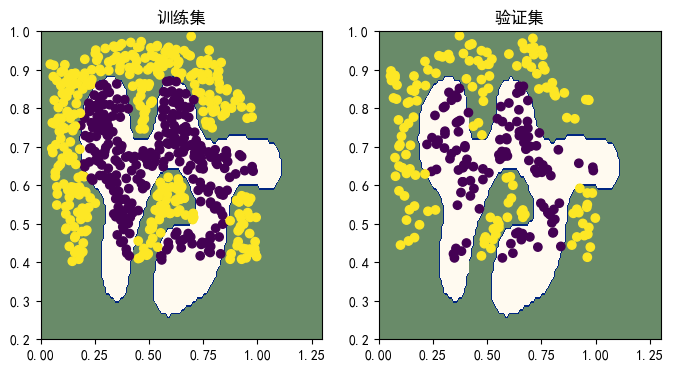

In [11]:
model_logtic = train_model_logtic(x_train, y_train.ravel(), 100, 'rbf')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt_fig(model_logtic, x_train, y_train, '训练集')
plt.subplot(1,2,2)
plt_fig(model_logtic, x_test, y_test, '验证集')

train accuracy:0.5298013245033113  test accuracy:0.5212355212355212


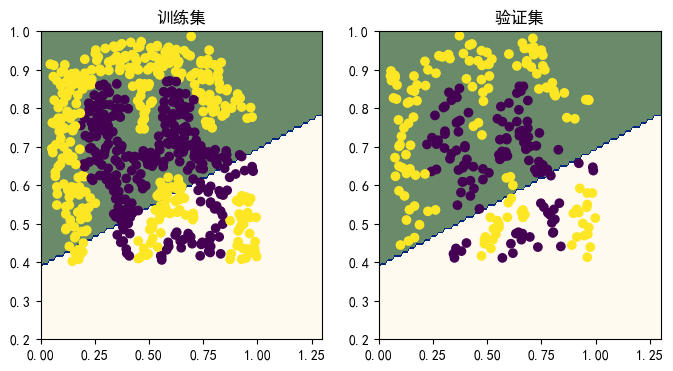

In [12]:
model_logtic = train_model_logtic(x_train, y_train.ravel(), 100, 'linear')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt_fig(model_logtic, x_train, y_train, '训练集')
plt.subplot(1,2,2)
plt_fig(model_logtic, x_test, y_test, '验证集')

train accuracy:0.7052980132450332  test accuracy:0.7451737451737451


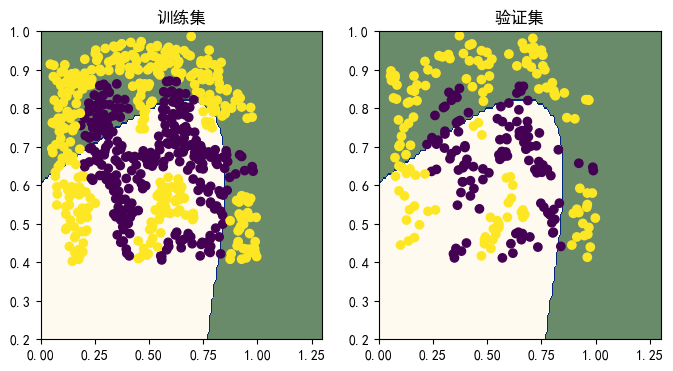

In [13]:
model_logtic = train_model_logtic(x_train, y_train.ravel(), 100, 'poly')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt_fig(model_logtic, x_train, y_train, '训练集')
plt.subplot(1,2,2)
plt_fig(model_logtic, x_test, y_test, '验证集')

train accuracy:0.8791390728476821  test accuracy:0.8725868725868726


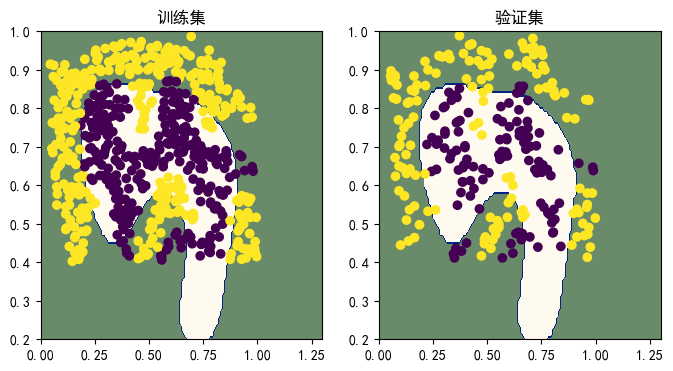

In [14]:
model_logtic = train_model_logtic(x_train, y_train.ravel(), 10, 'rbf')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt_fig(model_logtic, x_train, y_train, '训练集')
plt.subplot(1,2,2)
plt_fig(model_logtic, x_test, y_test, '验证集')

train accuracy:1.0  test accuracy:0.9420849420849421


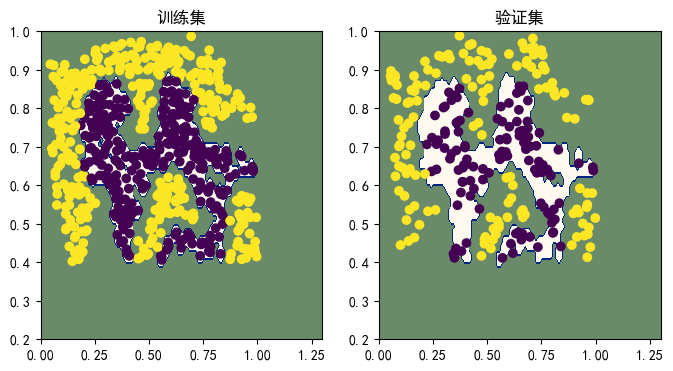

In [15]:
model_logtic = train_model_logtic(x_train, y_train.ravel(), 5000, 'rbf')
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt_fig(model_logtic, x_train, y_train, '训练集')
plt.subplot(1,2,2)
plt_fig(model_logtic, x_test, y_test, '验证集')

In [16]:
#load data
data = loadmat('data3.mat')
x_data, y_data = data['X'], data['y']     #The data structure
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

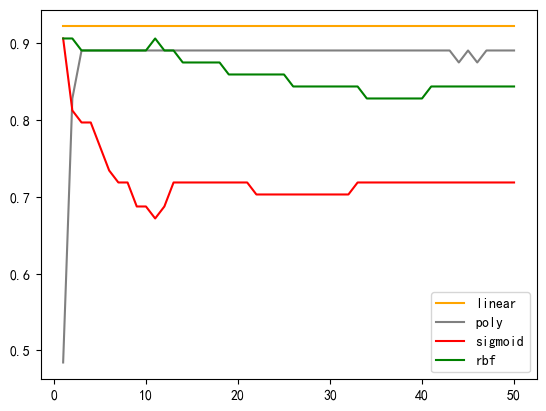

In [32]:
list = ['linear', 'poly', 'sigmoid', 'rbf']
acc = []
for kernel in range(len(list)):
    num = []
    for gamma in range(1, 500, 10):
        model_logtic = svm.SVC(kernel=list[kernel], gamma=gamma)
        model_logtic.fit(x_train, y_train.ravel())  #The model fitting
        num.append(model_logtic.score(x_test, y_test))
    acc.append(num)


plt.subplot()
x = range(1, len(acc[0])+1)
plt.plot(x, acc[0], label=list[0], color='orange')
plt.plot(x, acc[1], label=list[1], color='grey')
plt.plot(x, acc[2], label=list[2], color='red')
plt.plot(x, acc[3], label=list[3], color='green')
plt.legend()
plt.show()